In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.applications import VGG16

In [2]:
b_size =5
train_datagen = ImageDataGenerator(rescale=1./255, # 픽셀값을 0에서 1로 줄 것이다
                                  horizontal_flip=True,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  fill_mode='nearest')
train_generator = train_datagen.flow_from_directory('train', target_size=(150, 150),
                                                 batch_size=b_size,
                                                 class_mode='binary') # 이진 분류라는 걸 알려줌 -> 두개로 분류한다 
# target 을 스스로 잡는다 

Found 160 images belonging to 2 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('test', target_size=(150, 150),
                                                  batch_size=b_size,
                                                  class_mode='binary')

Found 120 images belonging to 2 classes.


In [4]:
transfer_model = VGG16(weights = 'imagenet', include_top=False, input_shape=(150,150,3))
transfer_model.trainable = False
transfer_model.summary()
# 일반적으로 소스의 마지막에 있는 부분이 실제적으로 top 부분에 위치하게 된다. (차례차례 되므로)
# 1470만개의 이미지로 학습

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [5]:
# 우리의 모델 만들기

finetune_model = Sequential()
finetune_model.add(transfer_model)
finetune_model.add(Flatten())
finetune_model.add(Dense(64, activation='relu'))
finetune_model.add(Dense(2, activation='softmax'))
finetune_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                524352    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 15,239,170
Trainable params: 524,482
Non-trainable params: 14,714,688
_________________________________________________________________


In [7]:
finetune_model.compile(loss='sparse_categorical_crossentropy',
             optimizer=optimizers.Adam(learning_rate=0.0002),
             metrics=['accuracy'])

steps_train = len(train_generator)
steps_test = len(test_generator)

hist = finetune_model.fit(train_generator, steps_per_epoch=steps_train,
                epochs=20, validation_data=test_generator,
                validation_steps = steps_test)

Train for 32 steps, validate for 24 steps
Epoch 1/20
32/32 [==============================] - 42s 1s/step - loss: 0.6802 - accuracy: 0.5875 - val_loss: 0.4980 - val_accuracy: 0.7500
Epoch 2/20
32/32 [==============================] - 42s 1s/step - loss: 0.4107 - accuracy: 0.8750 - val_loss: 0.3610 - val_accuracy: 0.9000
Epoch 3/20
32/32 [==============================] - 42s 1s/step - loss: 0.2934 - accuracy: 0.9312 - val_loss: 0.2846 - val_accuracy: 0.9250
Epoch 4/20
32/32 [==============================] - 43s 1s/step - loss: 0.2625 - accuracy: 0.9250 - val_loss: 0.2700 - val_accuracy: 0.9000
Epoch 5/20
32/32 [==============================] - 42s 1s/step - loss: 0.2156 - accuracy: 0.9312 - val_loss: 0.2013 - val_accuracy: 0.9333
Epoch 6/20
32/32 [==============================] - 44s 1s/step - loss: 0.1754 - accuracy: 0.9500 - val_loss: 0.1917 - val_accuracy: 0.9250
Epoch 7/20
32/32 [==============================] - 44s 1s/step - loss: 0.1656 - accuracy: 0.9500 - val_loss: 0.1641 -

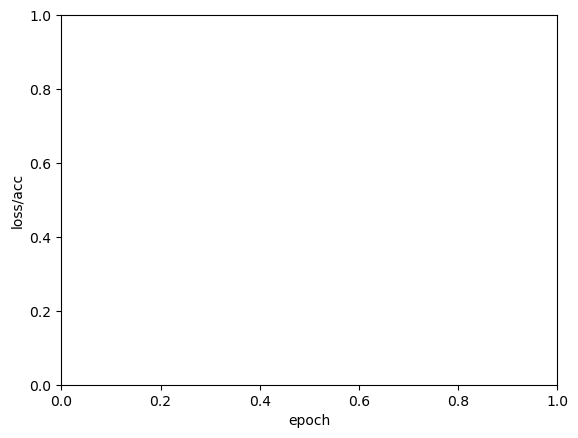

In [8]:
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()